### Bayesian Analysis

In [11]:
from __future__ import division
from collections import OrderedDict

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import itertools
import operator




%matplotlib inline

A box contains a 4-sided die, a 6-sided die, an 8-sided die, a 12-sided die, and a 20-sided die. A die is selected at random, and the rest are destroyed.

We would like to determine which die I have selected, given only information of what I roll.


---

**Prior Probability**:
- A PMF / PDF representing your initial beliefs about the parameter(s).  
- The initial belief is less represented as more data is incorporated



For this case our prior probability is a uniform distribution of the parameters (the dices $\theta$ ). Each dice has equal chance to be selected.

(**Prior**) $\pi(\theta) $ = U{4, 6, 8, 12, 20} = One-fifth chance for each dice.


*   4-side: 1./5 = 0.2
*   6-side: 1./5 = 0.2
*   8-side: 1./5 = 0.2
*   12-side: 1./5 = 0.2
*   20-side: 1./5 = 0.2


---
**Likelihood of Observations**:
- The probability of observing the data given the parameter(s)
- i.e. What is the likelihood of 3 Heads in a row given the probability of heads is 0.7?

The likelihood function is the probability of getting the data (the roll 'Y') given the parameter (the dice $\theta$ ). 



(**Likelihood**) $f(y|\theta) = \begin{cases}
\text{Unif}\{1, 2, 3, 4\},& \theta = 4 \\
\text{Unif}\{1, \ldots, 6\}, & \theta = 6 \\
\text{Unif}\{1, \ldots, 8\}, & \theta = 8 \\
\text{Unif}\{1, \ldots, 12\}, & \theta = 12\\
\text{Unif}\{1, \ldots, 20\}, & \theta = 20\\
\end{cases}$

*   4-side: 1./4 = 0.25
*   6-side: 1./6 = 0.166
*   8-side: 1./8 = 0.125
*   12-side: 1./12 = 0.083
*   20-side: 1./20 = 0.05



---
**Normalizing Constant**:
- The probability of observing the data. 
- In Bayesian analysis, this term ensures the sum of all probabilities is 1

(**Normalizing**) $ P(Y) = \sum_{i=1}^n P(Y | \theta_i) P(\theta_i) $

Say I roll a 3.

$P(Y)$ = (1./4 $\times$ 1./5) + (1./6 $\times$ 1./5) + (1./8 $\times$ 1./5) + (1./12 $\times$ 1./5) + (1./20 $\times$ 1./5) = 0.135

---


**Posterior Probability**:
- The product of prior and likelihood (Bayesian-update)
- The posterior probability becomes the prior of the next Bayesian-update

Say I roll an 8. After one bayesian update, what is the probability that I chose each of the dice?


(**Posterior**) $\pi_1(\theta\,|\,8) = \begin{cases}
\frac{15}{31}, & \theta = 8\\
\frac{10}{31}, & \theta = 12\\
\frac{6}{31}, & \theta = 20\\
0,& \text otherwise
\end{cases}$


* 4-sided die: (prior * 0(zero)) / normalizing =  0%  # because this die does not contain 8
* 6-sided die: (prior * 0(zero)) / normalizing =  0%  # because this die does not contain 8
* 8-sided die: (prior * likelihood) / normalizing =  48.4%
* 12-sided die:(prior * likelihood) / normalizing =  32.3%
* 20-sided die:(prior * likelihood) / normalizing =  19.4%


---
The posteriors if I had rolled the die 50 times instead of 1.

It will converge towards the actual parameter.

---


Which one of these two sets of data gives you a more certain posterior and why?

`[1, 1, 1, 3, 1, 2]` 
or 
`[10, 10, 10, 10, 8, 8]`


-The second set of data, since it rules out the parameters of the 4 and 6 sided die.

---

Say that I modify my prior by my belief that bigger dice are more likely to be drawn from the box. This is my prior distribution:

(**Prior**) $\pi(\theta) $ =
```
4-sided die: 8%
6-sided die: 12%
8-sided die: 16%
12-sided die: 24%
20-sided die: 40%
```


What are my posteriors for each die after rolling the 8?



(**Posterior**) $\pi_1(\theta\,|\,8) = \begin{cases}
\frac{1}{3}, & \theta = 8\\
\frac{1}{3}, & \theta = 12\\
\frac{1}{3}, & \theta = 20\\
0,& \text otherwise
\end{cases}$


* 4-sided die: (prior * 0(zero)) / normalizing =  0%  # because this die does not contain 8
* 6-sided die: (prior * 0(zero)) / normalizing =  0%  # because this die does not contain 8
* 8-sided die: (prior * likelihood) / normalizing =  33.3%
* 12-sided die:(prior * likelihood) / normalizing =  33.3%
* 20-sided die:(prior * likelihood) / normalizing =  33.3%


Which die do we think is most likely? Is this different than what you got with the previous prior?

Yes, its different. 8, 12, and 20 are equally likely.


---
Say you keep the same prior and you roll the die 50 times and get values 1-8 every time. What would you expect of the posterior? How different do you think it would be if you'd used the uniform prior?


If we got values 1-8 for the next 50 die rolls, the posterior would be that we likely have the 8-sided die and the distribution would converge towards the 8 sided die.  

If we used the uniform prior, we would have the same result after 50 rolls, but the shape of the distribution would be different in intermediary rolls.

In [ ]:
prior = 1./5
prior

In [ ]:
normalizing = (1./8*1./5 + 1./12*1./5 + 1./20*1./5)
normalizing

In [ ]:
likelihood = 1./8
likelihood

In [ ]:
bayes_8  = (prior * likelihood) / normalizing
bayes_8

In [ ]:
bayes_12  = (prior * (1./12)) / normalizing
bayes_12

In [ ]:
bayes_20 = (prior * (1./20)) / normalizing
bayes_20

In [ ]:
1./4*1./5 + 1./6*1./5 + 1./8*1./5 + 1./12*1./5 + 1./20*1./5 

In [ ]:
normalizing_new_belief = (1./8*.16 + 1./12*.24 + 1./20*.40)
normalizing_new_belief

In [ ]:
bayes_II = (0.16 * (1/8)) / normalizing_new_belief
bayes_II # for 8 side

In [ ]:
bayes_II_12 = (0.24 * (1/12)) / normalizing_new_belief
bayes_II_12

In [ ]:
bayes_II_20 = (0.40 * (1/20)) / normalizing_new_belief
bayes_II_20

### OO Bayes

In [1]:
pwd

u'/Users/eloisaelias/Desktop/weeks/_ipython'

In [4]:
cd ..

/Users/eloisaelias/Desktop


In [5]:
cd weeks_SHARED/W2_shared/power-bayesian/code

/Users/eloisaelias/Desktop/weeks_SHARED/W2_shared/power-bayesian/code


In [6]:
pwd

u'/Users/eloisaelias/Desktop/weeks_SHARED/W2_shared/power-bayesian/code'

In [8]:
prior = {'4': .2, '6': .2, '8': .2, '12': .2, '20': .2}

In [9]:
my_prior = {'4': .08, '6': .12, '8': .16, '12': .24, '20': .40}

In [80]:
from el_bayes import Bayes

In [81]:
def likelihood(data, key):
    if float(data) > float(key):
        return 0 
    else:
        return 1. / float(key)


In [82]:
test = Bayes(prior.copy(), likelihood)

In [83]:
test.print_distribution()

(4, 0.2)
(6, 0.2)
(8, 0.2)
(12, 0.2)
(20, 0.2)


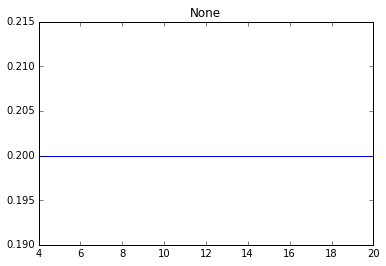

In [84]:
test.plot()

In [85]:
test.update_posterior(8)

In [86]:
test.print_distribution()

(4, 0.0)
(6, 0.0)
(8, 0.483870967742)
(12, 0.322580645161)
(20, 0.193548387097)


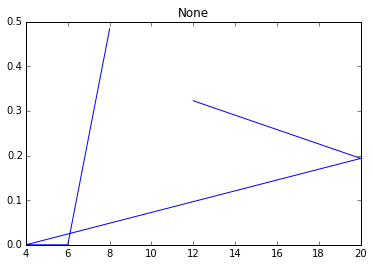

In [87]:
test.plot()

In [88]:
test_II = Bayes(my_prior.copy(), likelihood)

In [89]:
test_II.print_distribution()

(4, 0.08)
(6, 0.12)
(8, 0.16)
(12, 0.24)
(20, 0.4)


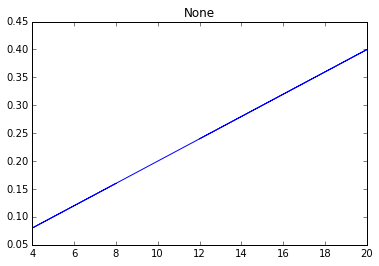

In [90]:
test_II.plot()

In [91]:
test_II.update_posterior(8)

In [92]:
test_II.print_distribution()

(4, 0.0)
(6, 0.0)
(8, 0.333333333333)
(12, 0.333333333333)
(20, 0.333333333333)


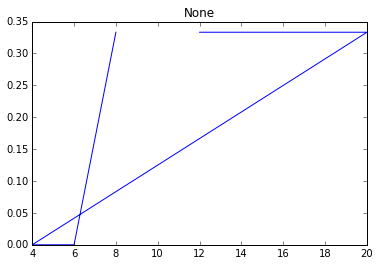

In [93]:
test_II.plot()

In [94]:
data = [8,2,1,2,5,8,2,4,3,7,6,5,1,6,2,5,8,8,5,3,4,2,4,3,8,
 8,7,8,8,8,5,5,1,3,8,7,8,5,2,5,1,4,1,2,1,3,1,3,1,5]

In [95]:
for i in data:
    test.update_posterior(i)
    #test.print_distribution()
    test_II.update_posterior(i)

print 'test'
test.print_distribution()
#test.plot(title='test')

print
print 'test_II'
test_II.print_distribution()
#test.plot(title='test_II')


test
(4, 0.0)
(6, 0.0)
(8, 0.999999998954)
(12, 1.04555236256e-09)
(20, 5.07060239561e-21)

test_II
(4, 0.0)
(6, 0.0)
(8, 0.999999998432)
(12, 1.56832854302e-09)
(20, 1.26765059824e-20)


This mean that when we update the posterior with a bunch of values not greater than the parameter in this case 8, then I have the 8-sided die and the distribution is converging towards the 8 sided die.  

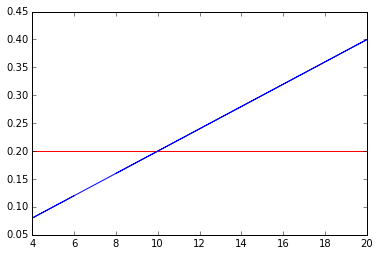

In [96]:
prior_ = {'4': .2, '6': .2, '8': .2, '12': .2, '20': .2}
my_prior_ = {'4': .08, '6': .12, '8': .16, '12': .24, '20': .40}
plt.plot(prior_.keys(), prior_.values(), 'r')
plt.plot(my_prior_.keys(), my_prior_.values(), 'b')

### Verifying via simulation

In [97]:
base = np.linspace(0, 0.99, 100)
prior_base = {}
for i in base:
    prior_base[round(i, 2)] = 0.01

In [101]:
def likelihood_funct_bernoulli(data, p):
    if data == 'H':
        return p
    else:
        return 1 - p
    

In [102]:
coin_1 = Bayes(prior_base.copy(), likelihood_funct_bernoulli)
coin_2 = Bayes(prior_base.copy(), likelihood_funct_bernoulli)
coin_3 = Bayes(prior_base.copy(), likelihood_funct_bernoulli)
coin_4 = Bayes(prior_base.copy(), likelihood_funct_bernoulli)
coin_5 = Bayes(prior_base.copy(), likelihood_funct_bernoulli)
coin_6 = Bayes(prior_base.copy(), likelihood_funct_bernoulli)
coin_7 = Bayes(prior_base.copy(), likelihood_funct_bernoulli)
coin_8 = Bayes(prior_base.copy(), likelihood_funct_bernoulli)

In [103]:
coin_1.update_posterior('H')
coin_2.update_posterior('T')
coin_3.update_posterior('H')
coin_3.update_posterior('H')
coin_4.update_posterior('T')
coin_4.update_posterior('H')
coin_5.update_posterior('H')
coin_5.update_posterior('H')
coin_5.update_posterior('H')
coin_6.update_posterior('T')
coin_6.update_posterior('H')
coin_6.update_posterior('T')
coin_7.update_posterior('H')
coin_7.update_posterior('H')
coin_7.update_posterior('H')
coin_7.update_posterior('H')
coin_8.update_posterior('T')
coin_8.update_posterior('H')
coin_8.update_posterior('T')
coin_8.update_posterior('H')

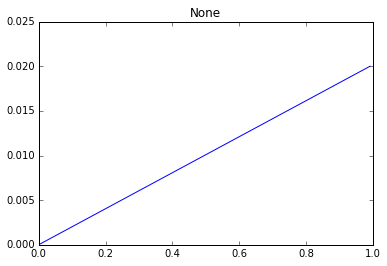

In [104]:
coin_1.plot()

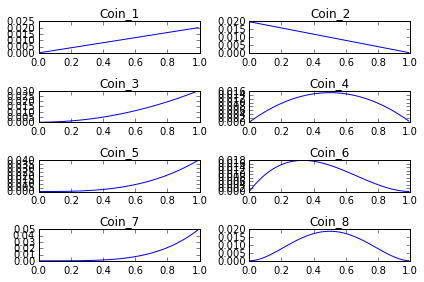

In [105]:
plt.subplot(4, 2, 1)
coin_1.plot(title= 'Coin_1')

plt.subplot(4, 2, 2)
coin_2.plot(title= 'Coin_2')

plt.subplot(4, 2, 3)
coin_3.plot(title= 'Coin_3')

plt.subplot(4, 2, 4)
coin_4.plot(title= 'Coin_4')

plt.subplot(4, 2, 5)
coin_5.plot(title= 'Coin_5')

plt.subplot(4, 2, 6)
coin_6.plot(title= 'Coin_6')

plt.subplot(4, 2, 7)
coin_7.plot(title= 'Coin_7')

plt.subplot(4, 2, 8)
coin_8.plot(title= 'Coin_8')

plt.tight_layout()

In [107]:
from coin import Coin

In [108]:
my_coin = Coin()

In [114]:
my_coin.flip()

'H'

coin flip number = coinf_#

In [115]:
coinf_0 = Bayes(prior_base.copy(), likelihood_funct_bernoulli)
coinf_1 = Bayes(prior_base.copy(), likelihood_funct_bernoulli)
coinf_2 = Bayes(prior_base.copy(), likelihood_funct_bernoulli)
coinf_10 = Bayes(prior_base.copy(), likelihood_funct_bernoulli)
coinf_50 = Bayes(prior_base.copy(), likelihood_funct_bernoulli)
coinf_250 =Bayes(prior_base.copy(), likelihood_funct_bernoulli)

In [116]:
coinf_1.update_posterior(my_coin.flip())

In [117]:
for i in xrange(2):
    coinf_2.update_posterior(my_coin.flip())



In [118]:
for i in xrange(10):
    coinf_10.update_posterior(my_coin.flip())


In [119]:
for i in xrange(50):
    coinf_50.update_posterior(my_coin.flip())


In [120]:
for i in xrange(250):
    coinf_250.update_posterior(my_coin.flip())


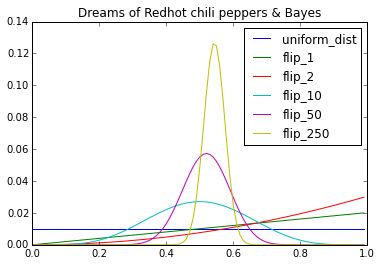

In [128]:
coinf_0.plot(label='uniform_dist')
coinf_1.plot(label='flip_1')
coinf_2.plot(label='flip_2' )
coinf_10.plot(label='flip_10')
coinf_50.plot(label='flip_50')
coinf_250.plot(label='flip_250')
plt.title('Dreams of Redhot chili peppers & Bayes');
plt.legend();

In [ ]:
# factor = 1. / float(sum(prior.values()))
# factor

In [ ]:
# sorted_dict = OrderedDict(sorted(prior.items(), key=lambda x : x[0]))
# for i in sorted_dict:
#     print i

In [ ]:
# def get_key(key):
#     try:
#         return int(key)
#     except ValueError:
#         return key
# a = OrderedDict(sorted(prior.items(), key=lambda x: get_key(x[0])))
# print a
# print 'keys:', a.keys()
# print 'values', a.values()
# # for i in a:
# #     print '({}, {})'.format(i, prior[i])
# #     #print a

In [ ]:
# suma = 0
# for i in unb_prior.values():
#     suma += i

# suma